Visualizations: Relationship between # of Hospitals and Mortality Rate (per County)

In [1]:
# Dependencies
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib as mpl

In [2]:
# Save path to data set in a variable
county_file = "Resources/county_data.csv"
merged_file = "Resources/final_cleaned_data.csv"

In [3]:
# Use Pandas to read data
county_pd = pd.read_csv(county_file)
county_pd.head()

,Unnamed: 0,State,County,Average Patient Rating,Average Completed Surveys,Average Survey Response Rate (%),Total Completed Surveys,Population,Crude Rate,Age Adjusted Rate
0,0,AL,AUTAUGA,4.0,579.0,25.0,579,55416,938.36,884.39
1,1,AL,BALDWIN,4.0,758.0,33.0,2274,208563,946.48,716.92
2,2,AL,BARBOUR,3.0,184.0,34.0,184,25965,985.94,800.68
3,3,AL,BLOUNT,4.0,128.0,29.0,128,57704,1207.89,989.37
4,4,AL,BUTLER,4.0,158.0,31.0,158,19998,1375.14,1014.00


In [4]:
# Use Pandas to read data
merged_pd = pd.read_csv(merged_file)
merged_pd.head()

,Unnamed: 0,State,County,City,Hospital,Location,Patient Rating,Completed Surveys,Survey Response Rate (%),Deaths,Population,Crude Rate,Age Adjusted Rate,% of Total Deaths
0,0,MN,HENNEPIN,ROBBINSDALE,NORTH MEMORIAL MEDICAL CENTER,"3300 OAKDALE NORTH\nROBBINSDALE, MN\n(45.01421...",3,957,26,8557,1232483,694.29,634.22,0.31
1,1,MN,HENNEPIN,MINNEAPOLIS,HENNEPIN COUNTY MEDICAL CENTER 1,"701 PARK AVENUE\nMINNEAPOLIS, MN\n(44.97285, -...",2,694,13,8557,1232483,694.29,634.22,0.31
2,2,MN,HENNEPIN,SAINT LOUIS PARK,PARK NICOLLET METHODIST HOSPITAL,"6500 EXCELSIOR BLVD\nSAINT LOUIS PARK, MN\n(44...",3,1199,34,8557,1232483,694.29,634.22,0.31
3,3,MN,HENNEPIN,MINNEAPOLIS,ABBOTT NORTHWESTERN HOSPITAL,"800 EAST 28TH STREET\nMINNEAPOLIS, MN\n(44.951...",3,865,35,8557,1232483,694.29,634.22,0.31
4,4,MN,HENNEPIN,MINNEAPOLIS,"UNIVERSITY OF MINNESOTA MEDICAL CENTER, FAIRVIEW","2450 RIVERSIDE AVENUE\nMINNEAPOLIS, MN\n(44.96...",3,515,25,8557,1232483,694.29,634.22,0.31


In [5]:
grouper = merged_pd.groupby(by=["State","County"])
grouper

In [6]:
df2 = grouper["Hospital"].count().to_frame().reset_index()
df2.head()

,State,County,Hospital
0,AL,AUTAUGA,1
1,AL,BALDWIN,3
2,AL,BARBOUR,1
3,AL,BLOUNT,1
4,AL,BUTLER,1


In [7]:
merged_data2 = pd.merge(county_pd, df2, on=["State", "County"], how="inner")

In [8]:
merged_data2 = merged_data2.rename(columns={"Hospital" : "Number of Hospitals"})
merged_data2.head()

,Unnamed: 0,State,County,Average Patient Rating,Average Completed Surveys,Average Survey Response Rate (%),Total Completed Surveys,Population,Crude Rate,Age Adjusted Rate,Number of Hospitals
0,0,AL,AUTAUGA,4.0,579.0,25.0,579,55416,938.36,884.39,1
1,1,AL,BALDWIN,4.0,758.0,33.0,2274,208563,946.48,716.92,3
2,2,AL,BARBOUR,3.0,184.0,34.0,184,25965,985.94,800.68,1
3,3,AL,BLOUNT,4.0,128.0,29.0,128,57704,1207.89,989.37,1
4,4,AL,BUTLER,4.0,158.0,31.0,158,19998,1375.14,1014.00,1


In [13]:
# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=merged_data2["Number of Hospitals"], y=merged_data2["Crude Rate"])

Linear regression: LinregressResult(slope=-20.322064024345647, intercept=1070.345234785184, rvalue=-0.23512859983702683, pvalue=1.9538085791072393e-22, stderr=2.055674848008603).


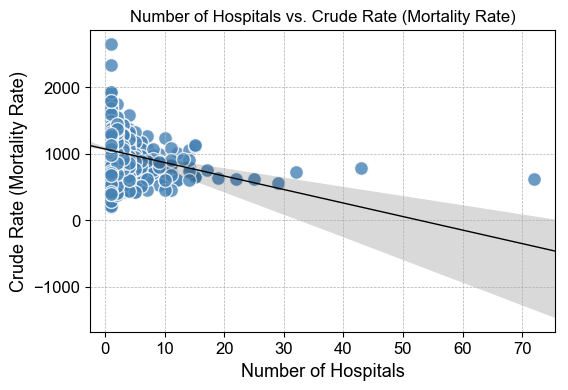

In [14]:
# Plot
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
font_size = 13
market_size = 100
line_width = 1

sns.regplot(merged_data2["Number of Hospitals"], merged_data2["Crude Rate"],
           scatter_kws={"s": market_size, "facecolor": 'steelblue', 
                        "edgecolors": 'w', "linewidth": line_width},
           line_kws={"color": 'k', "linewidth": line_width})

plt.xlabel('Number of Hospitals', fontsize = font_size)
plt.ylabel('Crude Rate (Mortality Rate)', fontsize = font_size)
plt.tick_params(labelsize=font_size-1)
plt.grid(linestyle='--', linewidth=0.5)
plt.title("Number of Hospitals vs. Crude Rate (Mortality Rate)")

print(f"Linear regression: {stats.linregress(merged_data2['Number of Hospitals'], merged_data2['Crude Rate'])}.")
    
plt.savefig('Number of Hospitals_vs_Crude Rate.png', bbox_inches="tight", dpi = 300)

In [15]:
# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=merged_data2["Number of Hospitals"], y=merged_data2["Age Adjusted Rate"])

Linear regression: LinregressResult(slope=-9.131812170634086, intercept=826.3986940230294, rvalue=-0.18899868937440664, pvalue=6.55777880705945e-15, stderr=1.1610245630156062).


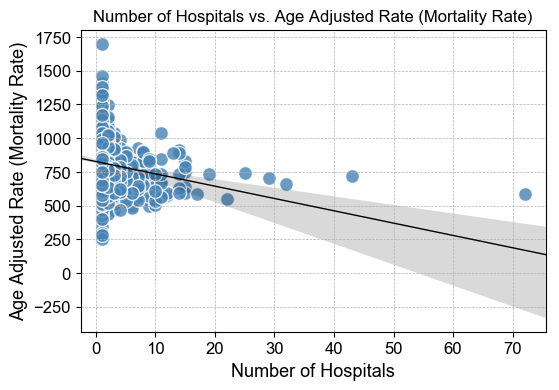

In [16]:
# Plot
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
font_size = 13
market_size = 100
line_width = 1

sns.regplot(merged_data2["Number of Hospitals"], merged_data2["Age Adjusted Rate"],
           scatter_kws={"s": market_size, "facecolor": 'steelblue', 
                        "edgecolors": 'w', "linewidth": line_width},
           line_kws={"color": 'k', "linewidth": line_width})

plt.xlabel('Number of Hospitals', fontsize = font_size)
plt.ylabel('Age Adjusted Rate (Mortality Rate)', fontsize = font_size)
plt.tick_params(labelsize=font_size-1)
plt.grid(linestyle='--', linewidth=0.5)
plt.title("Number of Hospitals vs. Age Adjusted Rate (Mortality Rate)")

print(f"Linear regression: {stats.linregress(merged_data2['Number of Hospitals'], merged_data2['Age Adjusted Rate'])}.")

plt.savefig('Number of Hospitals_vs_Age Adjusted Rate.png', bbox_inches="tight", dpi = 300)
